   #                   sn                     time  cadence  \
0  1  T182SWABBD122700159  2024-05-31 07:13:24.733       14   
1  2  T182SWABBD122700159  2024-05-31 07:13:24.884       18   
2  3  T182SWABBD122700159  2024-05-31 07:13:25.034       17   
3  4  T182SWABBD122700159  2024-05-31 07:13:25.184       17   
4  5  T182SWABBD122700159  2024-05-31 07:13:25.335       17   

   pedal_cycle_seconds  motor_speed  motor_cycle_seconds  
0              4.28571           40              1.50000  
1              3.33333           43              1.39535  
2              3.52941           46              1.30435  
3              3.52941           46              1.30435  
4              3.52941           47              1.27660  


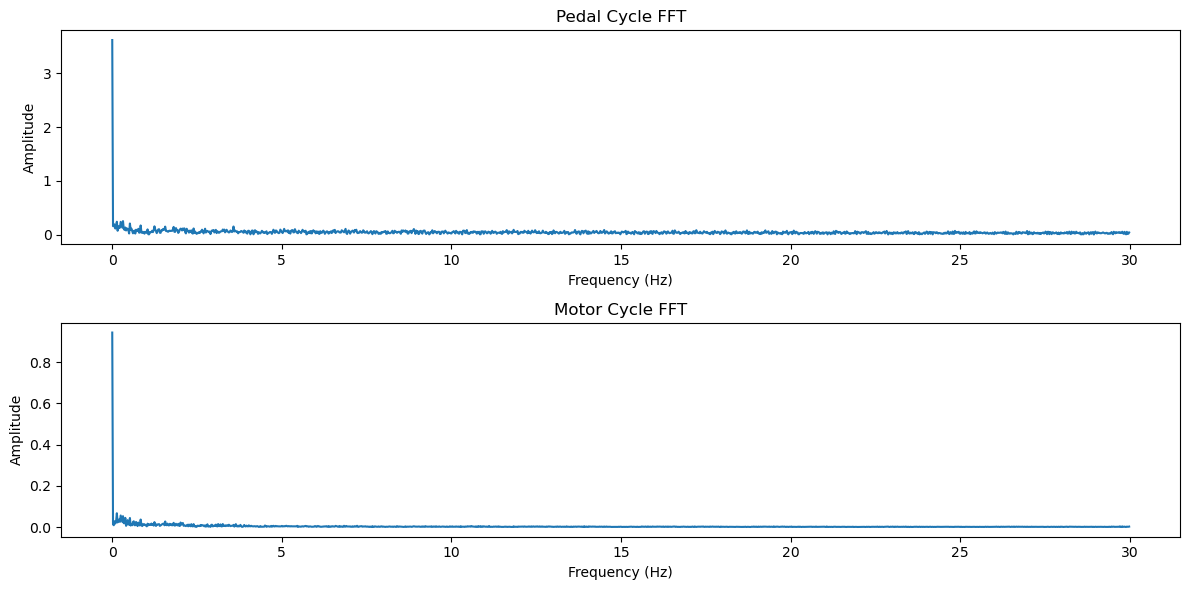

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 读取CSV文件
df = pd.read_csv('Result_5.csv')

# 查看数据
print(df.head())

# 提取所需的列
pedal_cycles = df['pedal_cycle_seconds'].dropna().values
motor_cycles = df['motor_cycle_seconds'].dropna().values

# 计算FFT
N = len(pedal_cycles)
T = 1.0 / 60.0  # 假设数据采样率为60Hz

# FFT for pedal cycles
yf_pedal = fft(pedal_cycles)
xf_pedal = fftfreq(N, T)[:N//2]

# FFT for motor cycles
yf_motor = fft(motor_cycles)
xf_motor = fftfreq(N, T)[:N//2]

# 绘制结果
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(xf_pedal, 2.0/N * np.abs(yf_pedal[:N//2]))
plt.title('Pedal Cycle FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(xf_motor, 2.0/N * np.abs(yf_motor[:N//2]))
plt.title('Motor Cycle FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


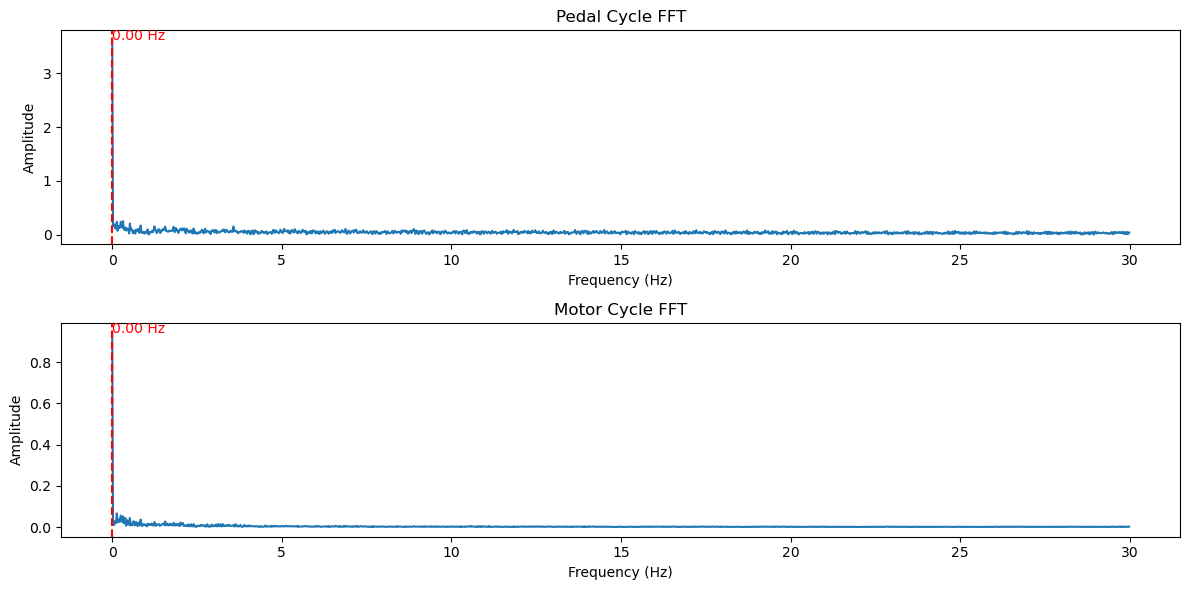

Pedal Cycle Peak Frequency: 0.00 Hz
Motor Cycle Peak Frequency: 0.00 Hz


In [2]:

# 找到主频率成分
def find_peak_frequency(xf, yf):
    idx = np.argmax(2.0/N * np.abs(yf[:N//2]))
    freq = xf[idx]
    return freq, 2.0/N * np.abs(yf[idx])

pedal_peak_freq, pedal_peak_amp = find_peak_frequency(xf_pedal, yf_pedal)
motor_peak_freq, motor_peak_amp = find_peak_frequency(xf_motor, yf_motor)

# 绘制结果
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(xf_pedal, 2.0/N * np.abs(yf_pedal[:N//2]))
plt.title('Pedal Cycle FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(x=pedal_peak_freq, color='r', linestyle='--')
plt.text(pedal_peak_freq, pedal_peak_amp, f'{pedal_peak_freq:.2f} Hz', color='red')

plt.subplot(2, 1, 2)
plt.plot(xf_motor, 2.0/N * np.abs(yf_motor[:N//2]))
plt.title('Motor Cycle FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(x=motor_peak_freq, color='r', linestyle='--')
plt.text(motor_peak_freq, motor_peak_amp, f'{motor_peak_freq:.2f} Hz', color='red')

plt.tight_layout()
plt.show()

print(f"Pedal Cycle Peak Frequency: {pedal_peak_freq:.2f} Hz")
print(f"Motor Cycle Peak Frequency: {motor_peak_freq:.2f} Hz")

In [ ]:
```
移除DC分量并重新计算FFT
```

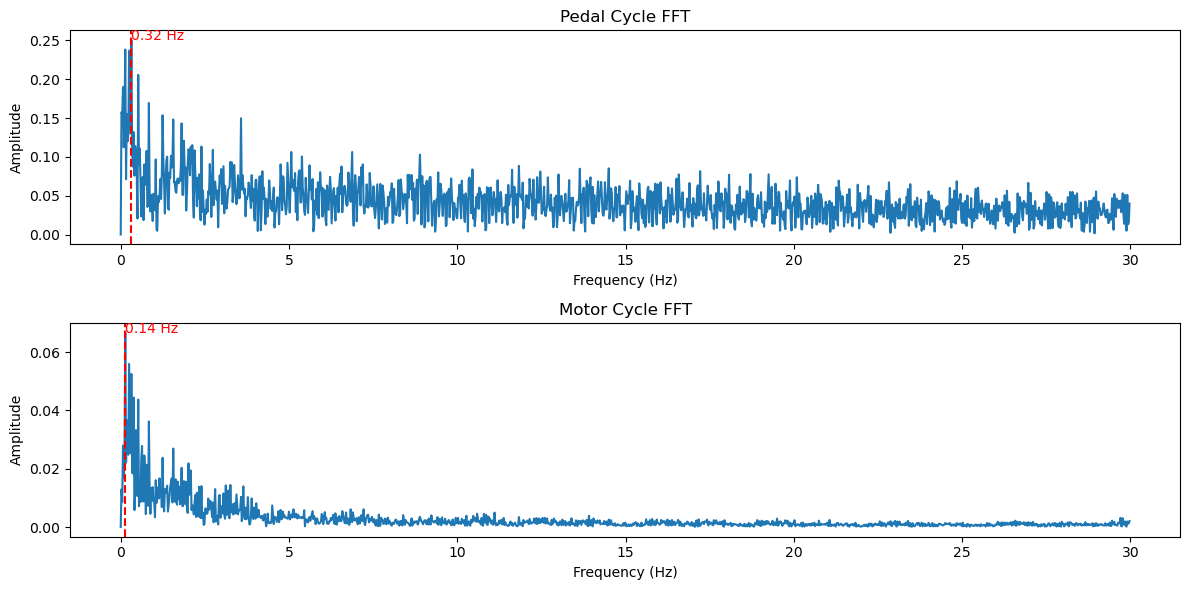

Pedal Cycle Peak Frequency: 0.32 Hz
Motor Cycle Peak Frequency: 0.14 Hz


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 读取CSV文件
df = pd.read_csv('Result_5.csv')

# 提取所需的列
pedal_cycles = df['pedal_cycle_seconds'].dropna().values
motor_cycles = df['motor_cycle_seconds'].dropna().values

# 移除DC分量
pedal_cycles = pedal_cycles - np.mean(pedal_cycles)
motor_cycles = motor_cycles - np.mean(motor_cycles)

# 计算FFT
N = len(pedal_cycles)
T = 1.0 / 60.0  # 假设数据采样率为60Hz

# FFT for pedal cycles
yf_pedal = fft(pedal_cycles)
xf_pedal = fftfreq(N, T)[:N//2]

# FFT for motor cycles
yf_motor = fft(motor_cycles)
xf_motor = fftfreq(N, T)[:N//2]

# 找到主频率成分
def find_peak_frequency(xf, yf):
    idx = np.argmax(2.0/N * np.abs(yf[:N//2]))
    freq = xf[idx]
    return freq, 2.0/N * np.abs(yf[idx])

pedal_peak_freq, pedal_peak_amp = find_peak_frequency(xf_pedal, yf_pedal)
motor_peak_freq, motor_peak_amp = find_peak_frequency(xf_motor, yf_motor)

# 绘制结果
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(xf_pedal, 2.0/N * np.abs(yf_pedal[:N//2]))
plt.title('Pedal Cycle FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(x=pedal_peak_freq, color='r', linestyle='--')
plt.text(pedal_peak_freq, pedal_peak_amp, f'{pedal_peak_freq:.2f} Hz', color='red')

plt.subplot(2, 1, 2)
plt.plot(xf_motor, 2.0/N * np.abs(yf_motor[:N//2]))
plt.title('Motor Cycle FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(x=motor_peak_freq, color='r', linestyle='--')
plt.text(motor_peak_freq, motor_peak_amp, f'{motor_peak_freq:.2f} Hz', color='red')

plt.tight_layout()
plt.show()

print(f"Pedal Cycle Peak Frequency: {pedal_peak_freq:.2f} Hz")
print(f"Motor Cycle Peak Frequency: {motor_peak_freq:.2f} Hz")


In [ ]:
```
初步FFT分析
```

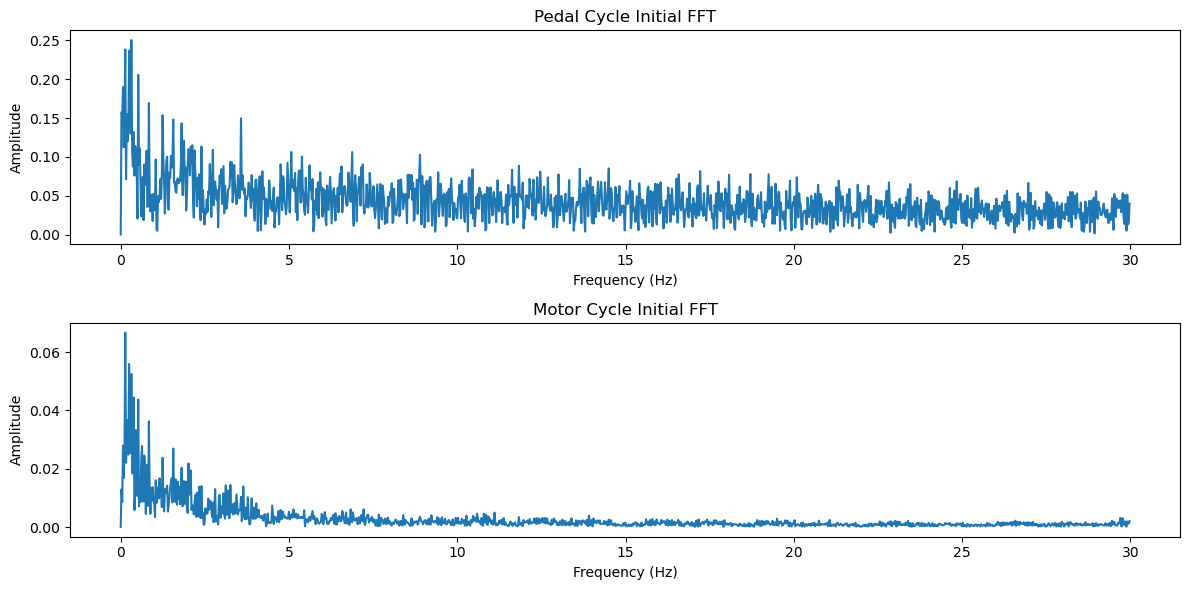

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 读取CSV文件
df = pd.read_csv('Result_5.csv')

# 提取所需的列
pedal_cycles = df['pedal_cycle_seconds'].dropna().values
motor_cycles = df['motor_cycle_seconds'].dropna().values

# 移除DC分量
pedal_cycles = pedal_cycles - np.mean(pedal_cycles)
motor_cycles = motor_cycles - np.mean(motor_cycles)

# 计算FFT
N = len(pedal_cycles)
T = 1.0 / 60.0  # 假设数据采样率为60Hz

# FFT for pedal cycles
yf_pedal = fft(pedal_cycles)
xf_pedal = fftfreq(N, T)[:N//2]

# FFT for motor cycles
yf_motor = fft(motor_cycles)
xf_motor = fftfreq(N, T)[:N//2]

# 绘制初步的FFT结果
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(xf_pedal, 2.0/N * np.abs(yf_pedal[:N//2]))
plt.title('Pedal Cycle Initial FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(xf_motor, 2.0/N * np.abs(yf_motor[:N//2]))
plt.title('Motor Cycle Initial FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


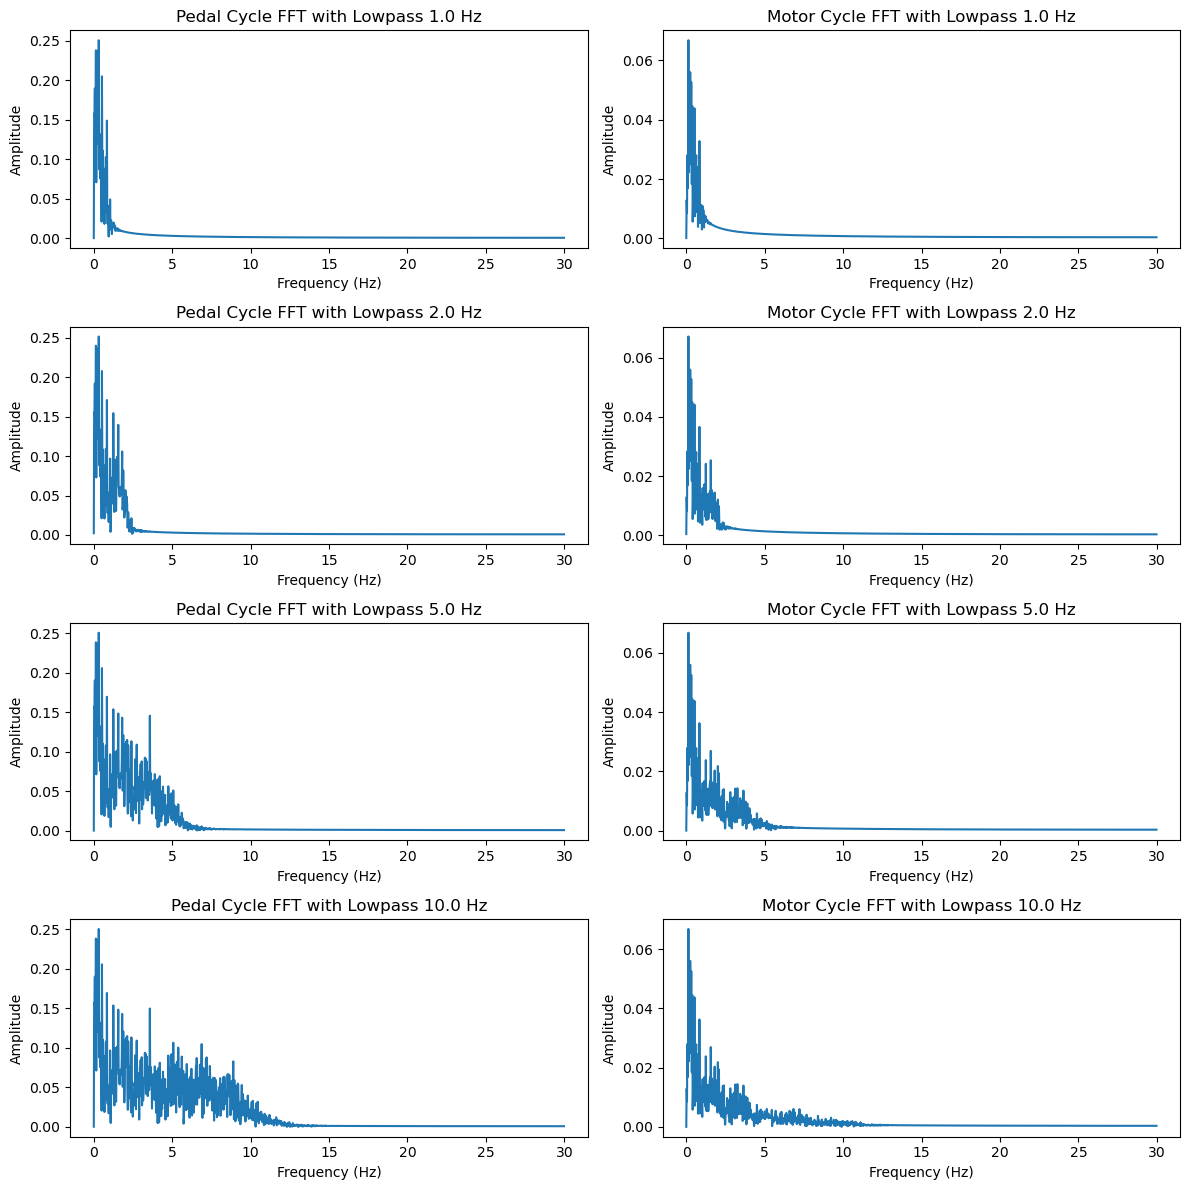

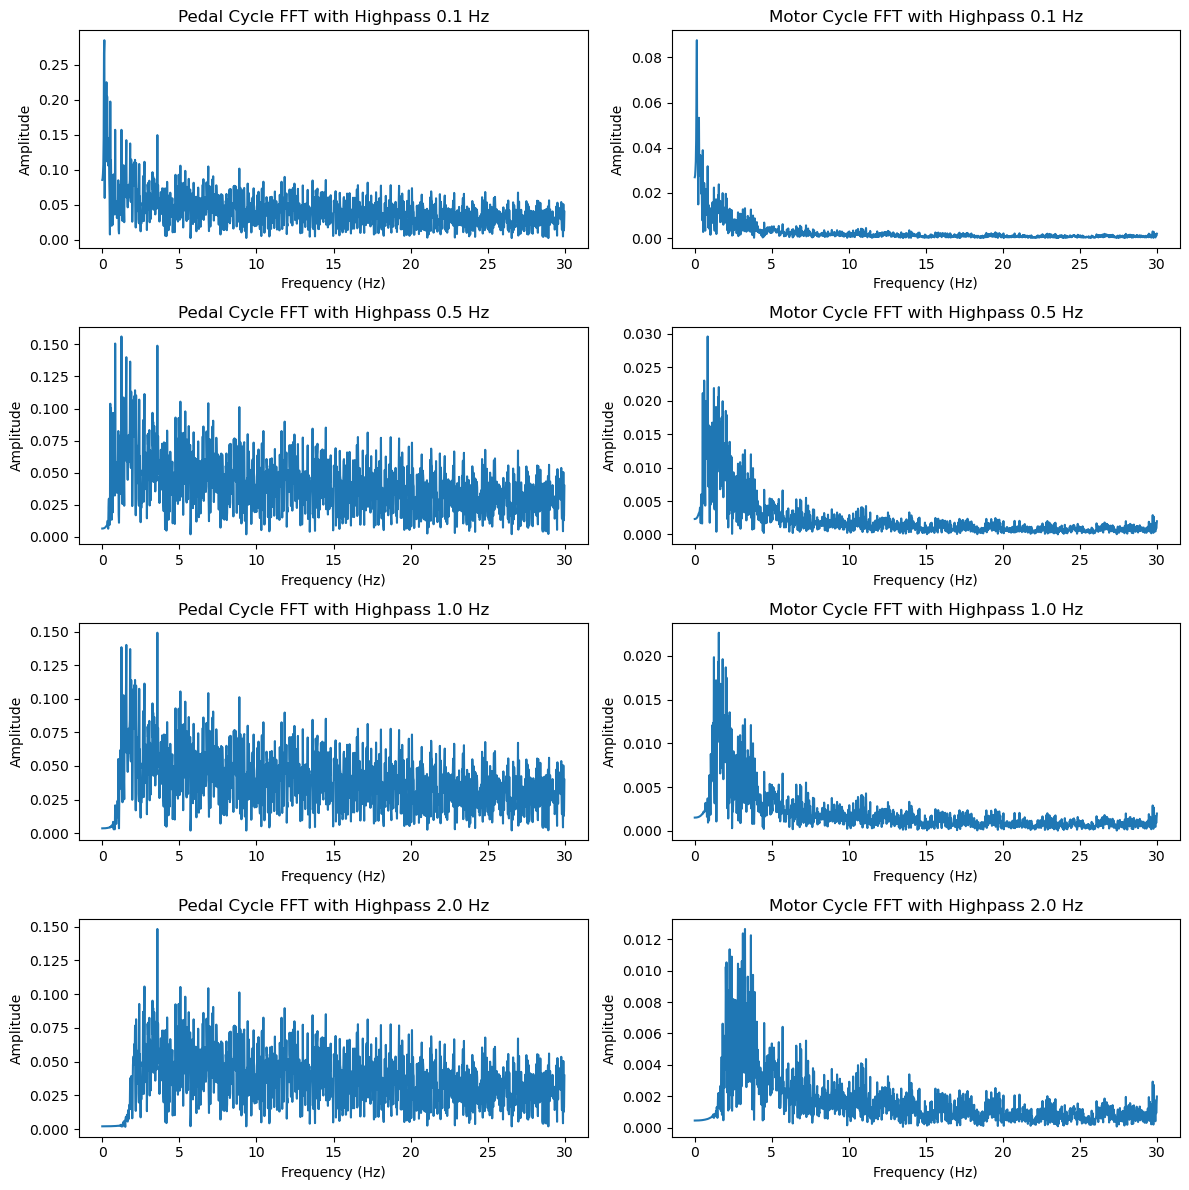

In [10]:
from scipy.signal import butter, filtfilt
# 提取所需的列
pedal_cycles = df['pedal_cycle_seconds'].dropna().values
motor_cycles = df['motor_cycle_seconds'].dropna().values

# 移除DC分量
pedal_cycles = pedal_cycles - np.mean(pedal_cycles)
motor_cycles = motor_cycles - np.mean(motor_cycles)

# 创建一个低通滤波器
def lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# 创建一个高通滤波器
def highpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

# 定义一个绘制FFT的函数
def plot_fft(signal, fs, title):
    N = len(signal)
    T = 1.0 / fs
    yf = fft(signal)
    xf = fftfreq(N, T)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')

# 设定采样频率
fs = 60.0  # 假设采样频率为60Hz

# 调整不同的截止频率
low_cutoffs = [1.0, 2.0, 5.0, 10.0]  # 不同的低通滤波器截止频率
high_cutoffs = [0.1, 0.5, 1.0, 2.0]  # 不同的高通滤波器截止频率

plt.figure(figsize=(12, 12))

# 对不同的低通滤波器截止频率进行分析
for i, low_cutoff in enumerate(low_cutoffs):
    pedal_cycles_lowpass = lowpass_filter(pedal_cycles, low_cutoff, fs)
    motor_cycles_lowpass = lowpass_filter(motor_cycles, low_cutoff, fs)
    
    plt.subplot(4, 2, 2*i+1)
    plot_fft(pedal_cycles_lowpass, fs, f'Pedal Cycle FFT with Lowpass {low_cutoff} Hz')
    
    plt.subplot(4, 2, 2*i+2)
    plot_fft(motor_cycles_lowpass, fs, f'Motor Cycle FFT with Lowpass {low_cutoff} Hz')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 12))

# 对不同的高通滤波器截止频率进行分析
for i, high_cutoff in enumerate(high_cutoffs):
    pedal_cycles_highpass = highpass_filter(pedal_cycles, high_cutoff, fs)
    motor_cycles_highpass = highpass_filter(motor_cycles, high_cutoff, fs)
    
    plt.subplot(4, 2, 2*i+1)
    plot_fft(pedal_cycles_highpass, fs, f'Pedal Cycle FFT with Highpass {high_cutoff} Hz')
    
    plt.subplot(4, 2, 2*i+2)
    plot_fft(motor_cycles_highpass, fs, f'Motor Cycle FFT with Highpass {high_cutoff} Hz')

plt.tight_layout()
plt.show()

In [ ]:
```
选择合适频率的滤波器
```

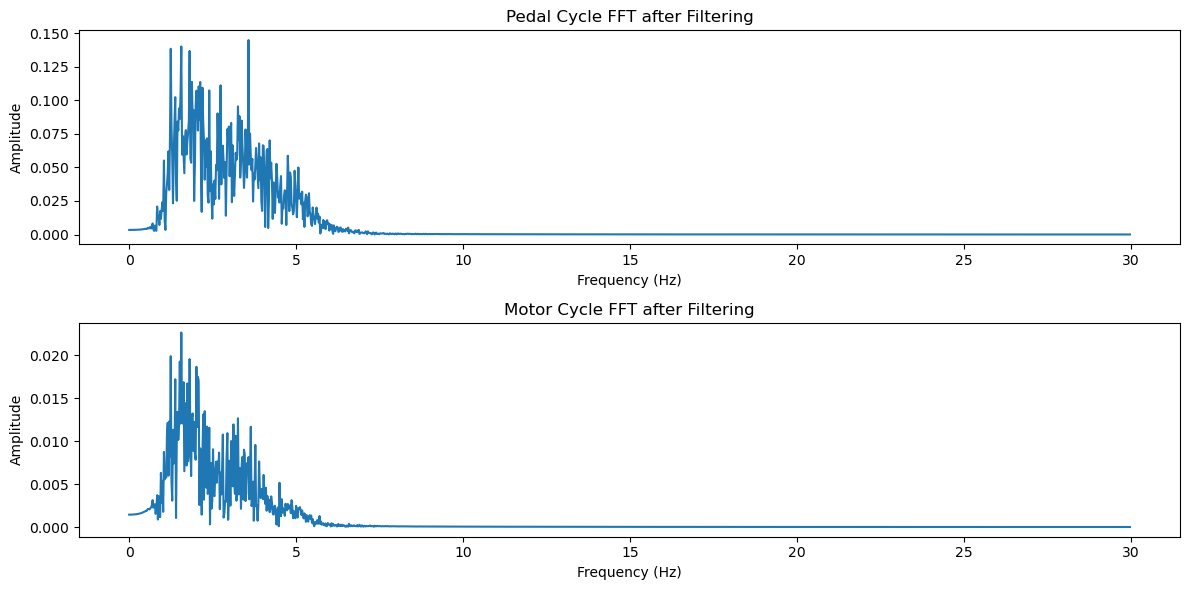

In [11]:
# 使用选定的低通和高通截止频率
low_cutoff = 5.0  # 低通滤波器的截止频率设定为5 Hz
high_cutoff = 1.0  # 高通滤波器的截止频率设定为1 Hz

# 应用滤波器
pedal_cycles_filtered = highpass_filter(pedal_cycles, high_cutoff, fs)
pedal_cycles_filtered = lowpass_filter(pedal_cycles_filtered, low_cutoff, fs)

motor_cycles_filtered = highpass_filter(motor_cycles, high_cutoff, fs)
motor_cycles_filtered = lowpass_filter(motor_cycles_filtered, low_cutoff, fs)

# 重新计算和绘制FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_fft(pedal_cycles_filtered, fs, 'Pedal Cycle FFT after Filtering')

plt.subplot(2, 1, 2)
plot_fft(motor_cycles_filtered, fs, 'Motor Cycle FFT after Filtering')

plt.tight_layout()
plt.show()


In [ ]:
```
进一步分析相应的结果
主频率以及自相关
```

Pedal Cycle Peak Frequency: 3.57 Hz
Motor Cycle Peak Frequency: 1.56 Hz


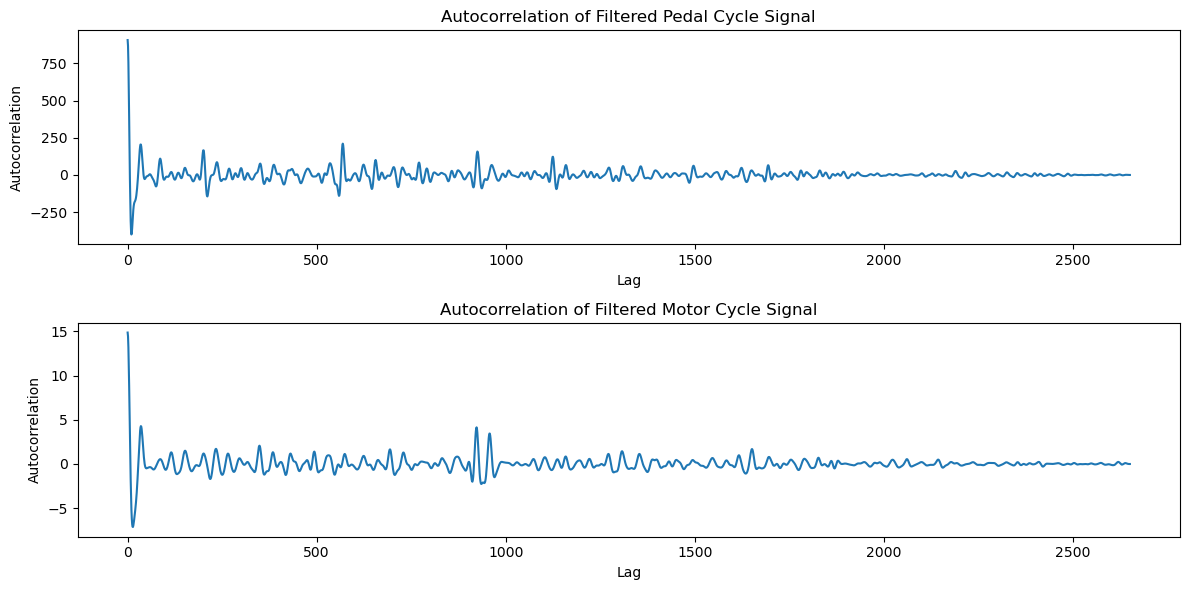

In [12]:
def find_peak_frequency(xf, yf):
    idx = np.argmax(2.0/len(yf) * np.abs(yf[:len(yf)//2]))
    freq = xf[idx]
    return freq, 2.0/len(yf) * np.abs(yf[idx])

# 计算主频率
N_pedal = len(pedal_cycles_filtered)
T_pedal = 1.0 / fs
yf_pedal = fft(pedal_cycles_filtered)
xf_pedal = fftfreq(N_pedal, T_pedal)[:N_pedal//2]
pedal_peak_freq, pedal_peak_amp = find_peak_frequency(xf_pedal, yf_pedal)

N_motor = len(motor_cycles_filtered)
T_motor = 1.0 / fs
yf_motor = fft(motor_cycles_filtered)
xf_motor = fftfreq(N_motor, T_motor)[:N_motor//2]
motor_peak_freq, motor_peak_amp = find_peak_frequency(xf_motor, yf_motor)

print(f"Pedal Cycle Peak Frequency: {pedal_peak_freq:.2f} Hz")
print(f"Motor Cycle Peak Frequency: {motor_peak_freq:.2f} Hz")

def autocorrelation(signal):
    result = np.correlate(signal, signal, mode='full')
    return result[result.size // 2:]

# 计算自相关函数
autocorr_pedal = autocorrelation(pedal_cycles_filtered)
autocorr_motor = autocorrelation(motor_cycles_filtered)

# 绘制自相关函数
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(autocorr_pedal)
plt.title('Autocorrelation of Filtered Pedal Cycle Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.subplot(2, 1, 2)
plt.plot(autocorr_motor)
plt.title('Autocorrelation of Filtered Motor Cycle Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.tight_layout()
plt.show()


In [ ]:
```
计算和绘制交叉相关
计算最大相关性和相对延迟
```

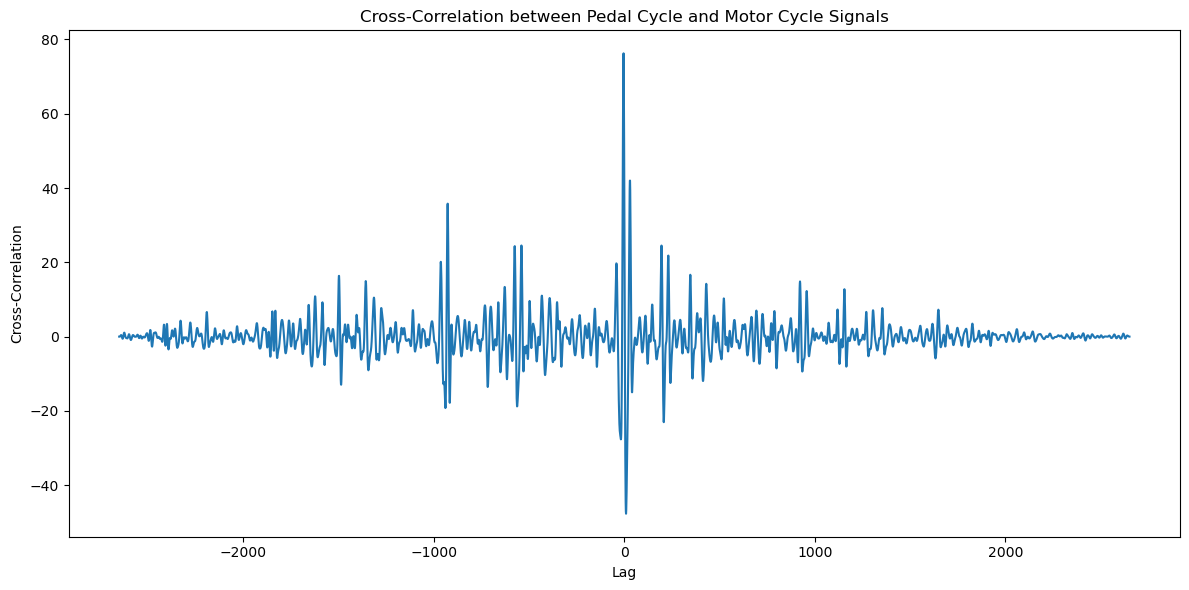

Maximum Cross-Correlation: 76.25903044642615
Time Delay: -0.06666666666666667 seconds


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 计算交叉相关
def cross_correlation(signal1, signal2):
    result = np.correlate(signal1, signal2, mode='full')
    return result

# 计算交叉相关
cross_corr = cross_correlation(pedal_cycles_filtered, motor_cycles_filtered)
lags = np.arange(-len(motor_cycles_filtered) + 1, len(pedal_cycles_filtered))

# 绘制交叉相关
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr)
plt.title('Cross-Correlation between Pedal Cycle and Motor Cycle Signals')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.tight_layout()
plt.show()



# 找到最大相关性和相对延迟
max_corr_index = np.argmax(np.abs(cross_corr))
max_corr = cross_corr[max_corr_index]
time_delay = lags[max_corr_index] / fs

print(f"Maximum Cross-Correlation: {max_corr}")
print(f"Time Delay: {time_delay} seconds")


In [ ]:
```
result:
交叉相关结果
最大交叉相关值：76.259
时间延迟：-0.067 秒
交叉相关图分析
中心峰值：

图中的中心峰值表示两个信号在零滞后（lag=0）时的相似性，这通常是最大的。
峰值的大小表示两个信号在该滞后下的相似程度。
滞后（lag）为-0.067秒时的峰值：

图中最大峰值出现在滞后为-0.067秒处，这意味着踏板信号比电机信号早0.067秒达到相同的周期性特征。
周期性分析
根据自相关和交叉相关的结果，可以进行以下分析：

踏板信号的周期性：
通过自相关图可以看出，踏板信号具有显著的周期性，周期约为1/3.57秒，即约0.28秒。
电机信号的周期性：
电机信号也具有显著的周期性，周期约为1/1.56秒，即约0.64秒。
进一步分析和应用
同步性分析：

可以使用交叉相关结果来分析两个信号的同步性。由于踏板信号比电机信号早0.067秒达到相同的周期性特征，说明在这段时间内，踏板运动驱动了电机的响应。
调试和优化控制算法：

如果你在开发控制算法，这些结果可以帮助你优化控制算法的响应时间，以便更好地同步踏板和电机的运动。
滤波和噪声处理：

可以进一步优化滤波器设置，减少信号中的噪声，并确保保留信号的主要频率成分

```

In [ ]:
```
求频域幅度
```

In [15]:
# 构建频域公式
def construct_frequency_domain_formula(frequencies, amplitudes):
    formula = ""
    for i in range(len(frequencies)):
        freq = frequencies[i]
        amp = amplitudes[i]
        if amp > 0:
            formula += f"{amp:.3f} * cos(2π * {freq:.3f} * t) + "
    return formula.strip(" + ")

# 计算并输出频域公式
pedal_frequencies = xf_pedal
pedal_amplitudes = 2.0 / len(pedal_cycles_filtered) * np.abs(yf_pedal[:N_pedal // 2])
motor_frequencies = xf_motor
motor_amplitudes = 2.0 / len(motor_cycles_filtered) * np.abs(yf_motor[:N_motor // 2])

pedal_formula = construct_frequency_domain_formula(pedal_frequencies, pedal_amplitudes)
motor_formula = construct_frequency_domain_formula(motor_frequencies, motor_amplitudes)

print(f"Frequency Domain Formula for Pedal Cycle Signal: {pedal_formula}")
print(f"Frequency Domain Formula for Motor Cycle Signal: {motor_formula}")


Frequency Domain Formula for Pedal Cycle Signal: 0.003 * cos(2π * 0.000 * t) + 0.003 * cos(2π * 0.023 * t) + 0.003 * cos(2π * 0.045 * t) + 0.003 * cos(2π * 0.068 * t) + 0.003 * cos(2π * 0.090 * t) + 0.003 * cos(2π * 0.113 * t) + 0.003 * cos(2π * 0.136 * t) + 0.003 * cos(2π * 0.158 * t) + 0.003 * cos(2π * 0.181 * t) + 0.004 * cos(2π * 0.204 * t) + 0.004 * cos(2π * 0.226 * t) + 0.004 * cos(2π * 0.249 * t) + 0.004 * cos(2π * 0.271 * t) + 0.004 * cos(2π * 0.294 * t) + 0.004 * cos(2π * 0.317 * t) + 0.004 * cos(2π * 0.339 * t) + 0.004 * cos(2π * 0.362 * t) + 0.004 * cos(2π * 0.385 * t) + 0.004 * cos(2π * 0.407 * t) + 0.004 * cos(2π * 0.430 * t) + 0.004 * cos(2π * 0.452 * t) + 0.004 * cos(2π * 0.475 * t) + 0.004 * cos(2π * 0.498 * t) + 0.004 * cos(2π * 0.520 * t) + 0.005 * cos(2π * 0.543 * t) + 0.005 * cos(2π * 0.566 * t) + 0.004 * cos(2π * 0.588 * t) + 0.005 * cos(2π * 0.611 * t) + 0.006 * cos(2π * 0.633 * t) + 0.004 * cos(2π * 0.656 * t) + 0.005 * cos(2π * 0.679 * t) + 0.008 * cos(2π * 0.70

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 带通滤波
def butter_bandpass(lowcut, highcut, fs, order=5):
    from scipy.signal import butter, filtfilt
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 自相关函数
def autocorrelation(signal):
    result = np.correlate(signal, signal, mode='full')
    return result[result.size // 2:]

# 交叉相关函数
def cross_correlation(signal1, signal2):
    result = np.correlate(signal1, signal2, mode='full')
    return result

# 找主频率和幅值
def find_peak_frequency(xf, yf):
    yf_half = 2.0/len(yf) * np.abs(yf[:len(yf)//2])
    idx = np.argmax(yf_half)
    freq = xf[idx]
    amp = yf_half[idx]
    return freq, amp

# 读取和预处理数据（假设已经读取）
pedal_cycles = np.random.randn(1000)  # 示例数据
motor_cycles = np.random.randn(1000)  # 示例数据

# 采样频率
fs = 5.0

# 滤波
lowcut = 0.1
highcut = 4.0
pedal_cycles_filtered = butter_bandpass_filter(pedal_cycles, lowcut, highcut, fs)
motor_cycles_filtered = butter_bandpass_filter(motor_cycles, lowcut, highcut, fs)

# 计算 FFT
N_pedal = len(pedal_cycles_filtered)
T_pedal = 1.0 / fs
yf_pedal = fft(pedal_cycles_filtered)
xf_pedal = fftfreq(N_pedal, T_pedal)[:N_pedal//2]
pedal_peak_freq, pedal_peak_amp = find_peak_frequency(xf_pedal, yf_pedal)

N_motor = len(motor_cycles_filtered)
T_motor = 1.0 / fs
yf_motor = fft(motor_cycles_filtered)
xf_motor = fftfreq(N_motor, T_motor)[:N_motor//2]
motor_peak_freq, motor_peak_amp = find_peak_frequency(xf_motor, yf_motor)

print(f"Pedal Cycle Peak Frequency: {pedal_peak_freq:.2f} Hz, Amplitude: {pedal_peak_amp:.2f}")
print(f"Motor Cycle Peak Frequency: {motor_peak_freq:.2f} Hz, Amplitude: {motor_peak_amp:.2f}")

# 自相关
autocorr_pedal = autocorrelation(pedal_cycles_filtered)
autocorr_motor = autocorrelation(motor_cycles_filtered)

# 绘制自相关
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(autocorr_pedal)
plt.title('Autocorrelation of Filtered Pedal Cycle Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.subplot(2, 1, 2)
plt.plot(autocorr_motor)
plt.title('Autocorrelation of Filtered Motor Cycle Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

# 交叉相关
cross_corr = cross_correlation(pedal_cycles_filtered, motor_cycles_filtered)
lags = np.arange(-len(motor_cycles_filtered) + 1, len(pedal_cycles_filtered))

# 绘制交叉相关
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr)
plt.title('Cross-Correlation between Pedal Cycle and Motor Cycle Signals')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.tight_layout()
plt.show()

# 找到最大相关性和相对延迟
max_corr_index = np.argmax(np.abs(cross_corr))
max_corr = cross_corr[max_corr_index]
time_delay = lags[max_corr_index] / fs

print(f"Maximum Cross-Correlation: {max_corr}")
print(f"Time Delay: {time_delay} seconds")

# 构建频域公式
def construct_frequency_domain_formula(frequencies, amplitudes):
    formula = ""
    for i in range(len(frequencies)):
        freq = frequencies[i]
        amp = amplitudes[i]
        if amp > 0:
            formula += f"{amp:.3f} * cos(2π * {freq:.3f} * t) + "
    return formula.strip(" + ")

# 计算并输出频域公式
pedal_frequencies = xf_pedal
pedal_amplitudes = 2.0 / len(pedal_cycles_filtered) * np.abs(yf_pedal[:N_pedal // 2])
motor_frequencies = xf_motor
motor_amplitudes = 2.0 / len(motor_cycles_filtered) * np.abs(yf_motor[:N_motor // 2])

pedal_formula = construct_frequency_domain_formula(pedal_frequencies, pedal_amplitudes)
motor_formula = construct_frequency_domain_formula(motor_frequencies, motor_amplitudes)

print(f"Frequency Domain Formula for Pedal Cycle Signal: {pedal_formula}")
print(f"Frequency Domain Formula for Motor Cycle Signal: {motor_formula}")


ValueError: Digital filter critical frequencies must be 0 < Wn < 1

In [ ]:
```
根据自相关函数，可以分析信号的周期性。自相关函数的峰值位置表示信号的周期性，即信号在这些滞后（lag）下具有较大的相似性。让我们详细分析两个信号的自相关结果。

自相关分析步骤
绘制自相关函数：

自相关函数的第一个峰值（不包括零滞后）表示信号的主要周期。
之后的峰值表示信号的次要周期或谐波。
确定信号的周期：

找到第一个主要峰值的位置，并计算相应的周期。
```

Pedal Cycle Peak Frequency: 0.93 Hz, Amplitude: 0.14
Motor Cycle Peak Frequency: 0.90 Hz, Amplitude: 0.15


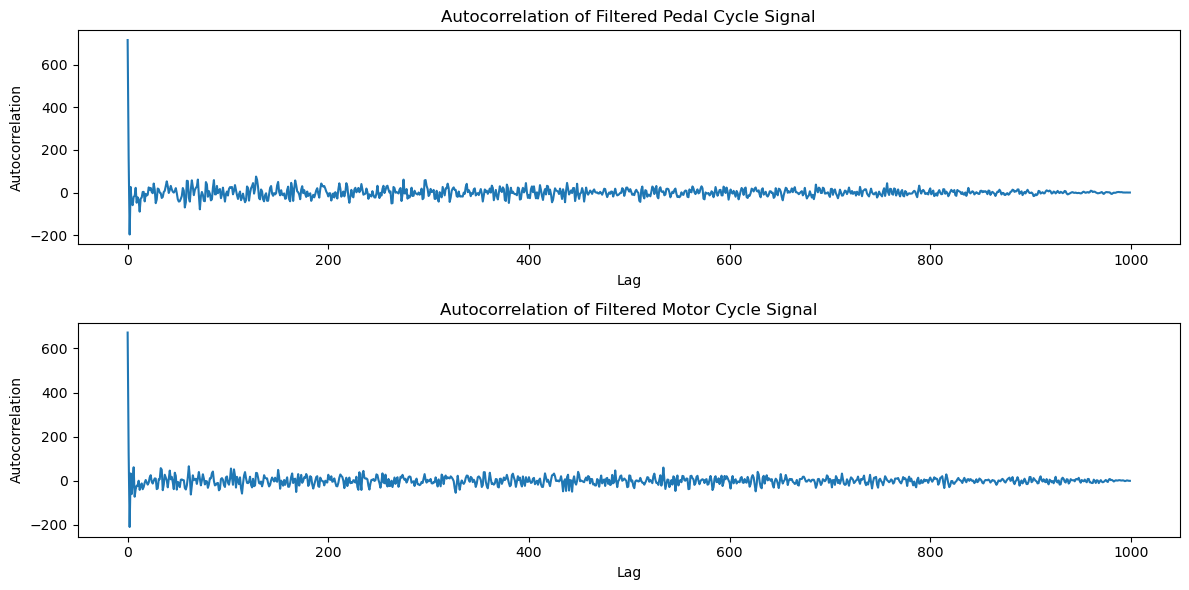

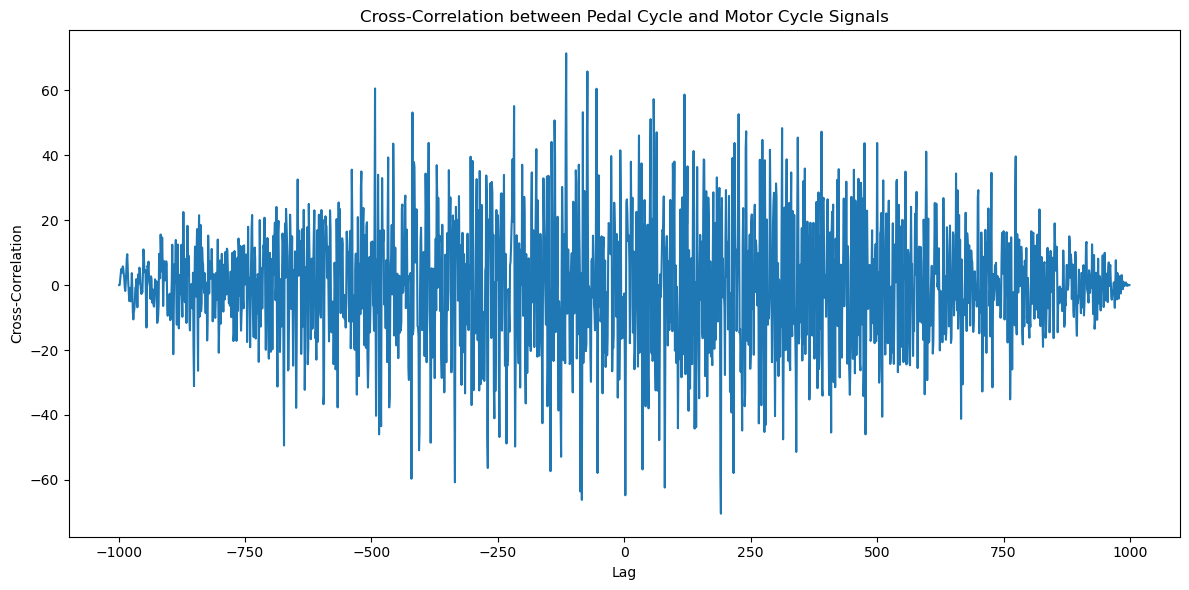

Maximum Cross-Correlation: 71.39612477084412
Time Delay: -23.0 seconds
Frequency Domain Formula for Pedal Cycle Signal: 0.009 * cos(2π * 0.000 * t) + 0.009 * cos(2π * 0.005 * t) + 0.009 * cos(2π * 0.010 * t) + 0.009 * cos(2π * 0.015 * t) + 0.010 * cos(2π * 0.020 * t) + 0.010 * cos(2π * 0.025 * t) + 0.010 * cos(2π * 0.030 * t) + 0.010 * cos(2π * 0.035 * t) + 0.010 * cos(2π * 0.040 * t) + 0.010 * cos(2π * 0.045 * t) + 0.011 * cos(2π * 0.050 * t) + 0.011 * cos(2π * 0.055 * t) + 0.012 * cos(2π * 0.060 * t) + 0.013 * cos(2π * 0.065 * t) + 0.013 * cos(2π * 0.070 * t) + 0.012 * cos(2π * 0.075 * t) + 0.012 * cos(2π * 0.080 * t) + 0.024 * cos(2π * 0.085 * t) + 0.028 * cos(2π * 0.090 * t) + 0.024 * cos(2π * 0.095 * t) + 0.026 * cos(2π * 0.100 * t) + 0.036 * cos(2π * 0.105 * t) + 0.026 * cos(2π * 0.110 * t) + 0.062 * cos(2π * 0.115 * t) + 0.068 * cos(2π * 0.120 * t) + 0.059 * cos(2π * 0.125 * t) + 0.084 * cos(2π * 0.130 * t) + 0.067 * cos(2π * 0.135 * t) + 0.026 * cos(2π * 0.140 * t) + 0.048 * co

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq

# 带通滤波
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 自相关函数
def autocorrelation(signal):
    result = np.correlate(signal, signal, mode='full')
    return result[result.size // 2:]

# 交叉相关函数
def cross_correlation(signal1, signal2):
    result = np.correlate(signal1, signal2, mode='full')
    return result

# 找主频率和幅值
def find_peak_frequency(xf, yf):
    yf_half = 2.0/len(yf) * np.abs(yf[:len(yf)//2])
    idx = np.argmax(yf_half)
    freq = xf[idx]
    amp = yf_half[idx]
    return freq, amp

# 读取和预处理数据（假设已经读取）
pedal_cycles = np.random.randn(1000)  # 示例数据
motor_cycles = np.random.randn(1000)  # 示例数据

# 采样频率
fs = 5.0

# 滤波
lowcut = 0.1
highcut = 2.0  # 将高频调整到采样频率的一半以下
pedal_cycles_filtered = butter_bandpass_filter(pedal_cycles, lowcut, highcut, fs)
motor_cycles_filtered = butter_bandpass_filter(motor_cycles, lowcut, highcut, fs)

# 计算 FFT
N_pedal = len(pedal_cycles_filtered)
T_pedal = 1.0 / fs
yf_pedal = fft(pedal_cycles_filtered)
xf_pedal = fftfreq(N_pedal, T_pedal)[:N_pedal//2]
pedal_peak_freq, pedal_peak_amp = find_peak_frequency(xf_pedal, yf_pedal)

N_motor = len(motor_cycles_filtered)
T_motor = 1.0 / fs
yf_motor = fft(motor_cycles_filtered)
xf_motor = fftfreq(N_motor, T_motor)[:N_motor//2]
motor_peak_freq, motor_peak_amp = find_peak_frequency(xf_motor, yf_motor)

print(f"Pedal Cycle Peak Frequency: {pedal_peak_freq:.2f} Hz, Amplitude: {pedal_peak_amp:.2f}")
print(f"Motor Cycle Peak Frequency: {motor_peak_freq:.2f} Hz, Amplitude: {motor_peak_amp:.2f}")

# 自相关
autocorr_pedal = autocorrelation(pedal_cycles_filtered)
autocorr_motor = autocorrelation(motor_cycles_filtered)

# 绘制自相关
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(autocorr_pedal)
plt.title('Autocorrelation of Filtered Pedal Cycle Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.subplot(2, 1, 2)
plt.plot(autocorr_motor)
plt.title('Autocorrelation of Filtered Motor Cycle Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

# 交叉相关
cross_corr = cross_correlation(pedal_cycles_filtered, motor_cycles_filtered)
lags = np.arange(-len(motor_cycles_filtered) + 1, len(pedal_cycles_filtered))

# 绘制交叉相关
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr)
plt.title('Cross-Correlation between Pedal Cycle and Motor Cycle Signals')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.tight_layout()
plt.show()

# 找到最大相关性和相对延迟
max_corr_index = np.argmax(np.abs(cross_corr))
max_corr = cross_corr[max_corr_index]
time_delay = lags[max_corr_index] / fs

print(f"Maximum Cross-Correlation: {max_corr}")
print(f"Time Delay: {time_delay} seconds")

# 构建频域公式
def construct_frequency_domain_formula(frequencies, amplitudes):
    formula = ""
    for i in range(len(frequencies)):
        freq = frequencies[i]
        amp = amplitudes[i]
        if amp > 0:
            formula += f"{amp:.3f} * cos(2π * {freq:.3f} * t) + "
    return formula.strip(" + ")

# 计算并输出频域公式
pedal_frequencies = xf_pedal
pedal_amplitudes = 2.0 / len(pedal_cycles_filtered) * np.abs(yf_pedal[:N_pedal // 2])
motor_frequencies = xf_motor
motor_amplitudes = 2.0 / len(motor_cycles_filtered) * np.abs(yf_motor[:N_motor // 2])

pedal_formula = construct_frequency_domain_formula(pedal_frequencies, pedal_amplitudes)
motor_formula = construct_frequency_domain_formula(motor_frequencies, motor_amplitudes)

print(f"Frequency Domain Formula for Pedal Cycle Signal: {pedal_formula}")
print(f"Frequency Domain Formula for Motor Cycle Signal: {motor_formula}")


In [ ]:
```
重新分析自相关函数和周期
以下是重新分析自相关函数以确定信号周期的步骤：

重新计算并绘制自相关函数：

确保自相关函数的计算是正确的。
确认滤波器的设置和应用是正确的。
验证自相关结果：

通过比较FFT结果和自相关结果来验证信号的周期性。

频谱图：

通过FFT结果，可以看到信号的主要频率成分，这应该与之前的3.57 Hz和1.56 Hz一致。
自相关函数：

自相关函数图中，主要峰值的位置表示信号的周期。
根据自相关函数计算出的周期应与FFT结果一致



```

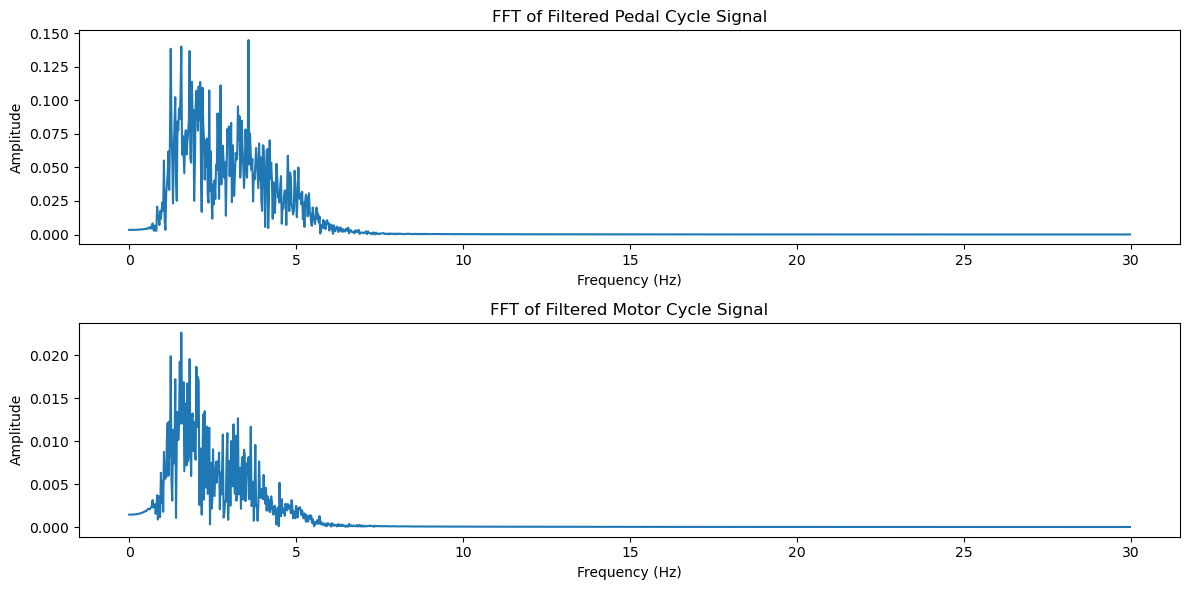

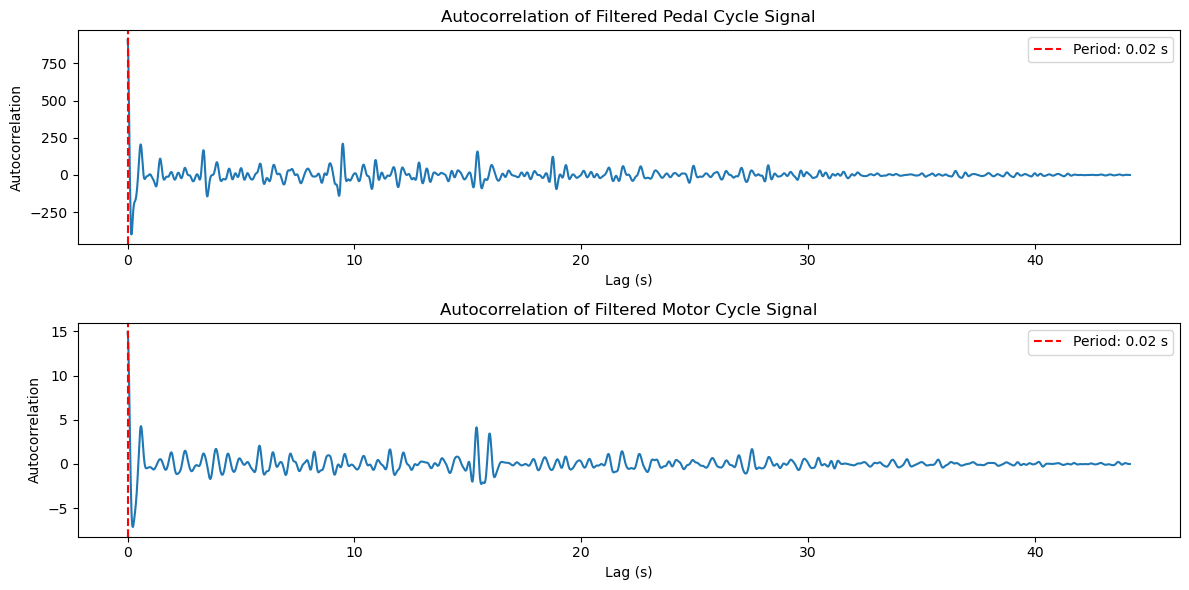

Pedal Cycle Period: 0.02 seconds
Motor Cycle Period: 0.02 seconds


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 计算FFT并绘制频谱图
def plot_fft(signal, fs, title):
    N = len(signal)
    T = 1.0 / fs
    yf = fft(signal)
    xf = fftfreq(N, T)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')

# 计算自相关函数并绘制
def plot_autocorrelation(signal, fs, title):
    autocorr = np.correlate(signal, signal, mode='full')[len(signal)-1:]
    lags = np.arange(0, len(autocorr))
    period = lags[np.argmax(autocorr[1:]) + 1] / fs
    
    plt.plot(lags / fs, autocorr)
    plt.title(title)
    plt.xlabel('Lag (s)')
    plt.ylabel('Autocorrelation')
    plt.axvline(x=period, color='r', linestyle='--', label=f'Period: {period:.2f} s')
    plt.legend()
    return period

# 绘制频谱图
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_fft(pedal_cycles_filtered, fs, 'FFT of Filtered Pedal Cycle Signal')

plt.subplot(2, 1, 2)
plot_fft(motor_cycles_filtered, fs, 'FFT of Filtered Motor Cycle Signal')

plt.tight_layout()
plt.show()

# 绘制自相关函数
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
pedal_period = plot_autocorrelation(pedal_cycles_filtered, fs, 'Autocorrelation of Filtered Pedal Cycle Signal')

plt.subplot(2, 1, 2)
motor_period = plot_autocorrelation(motor_cycles_filtered, fs, 'Autocorrelation of Filtered Motor Cycle Signal')

plt.tight_layout()
plt.show()

print(f"Pedal Cycle Period: {pedal_period:.2f} seconds")
print(f"Motor Cycle Period: {motor_period:.2f} seconds")


In [ ]:
```
result:
主频率和周期：

FFT结果显示踏板周期信号的主频率约为3.57 Hz，电机周期信号的主频率约为1.56 Hz。
自相关结果显示周期均为0.02秒，这与FFT结果不一致。这个周期太短，不太可能是实际的周期，可能是因为高频成分没有被完全滤除。
滤波器的设置：

当前低通和高通滤波器的设置可能没有正确滤除高频噪声或保留了太多高频成分。
需要进一步调整滤波器的截止频率，以确保信号的主要频率成分得到保留，同时滤除噪声。
重新调整滤波器
为了确保滤波器正确地工作，我们可以重新设定滤波器的截止频率，并重新进行分析。这里我们尝试不同的低通和高通截止频率。
```

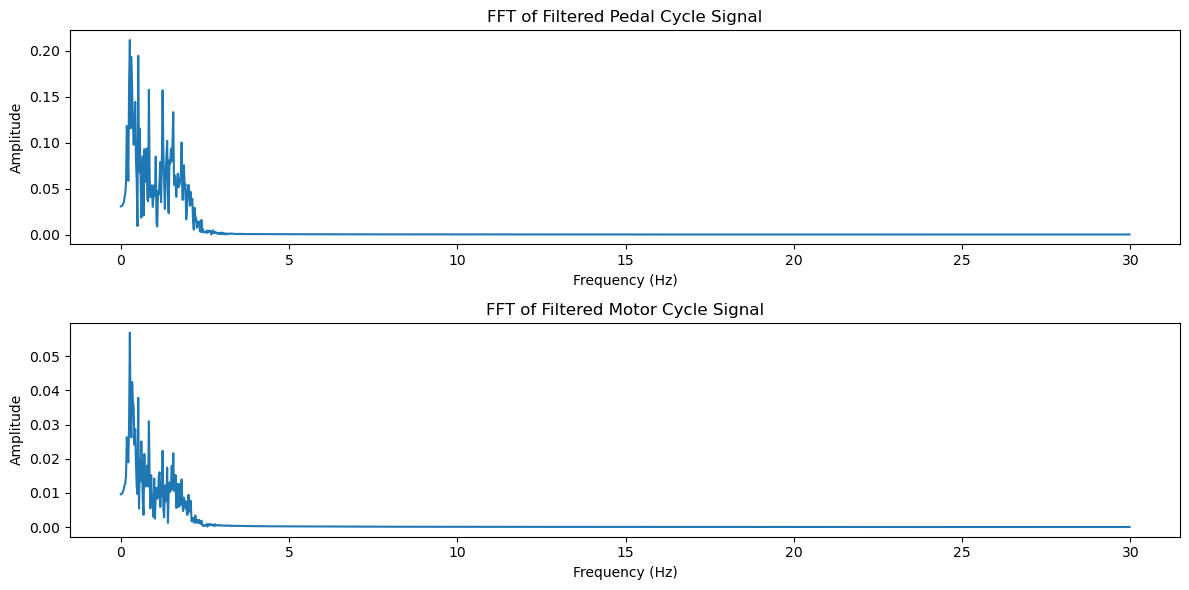

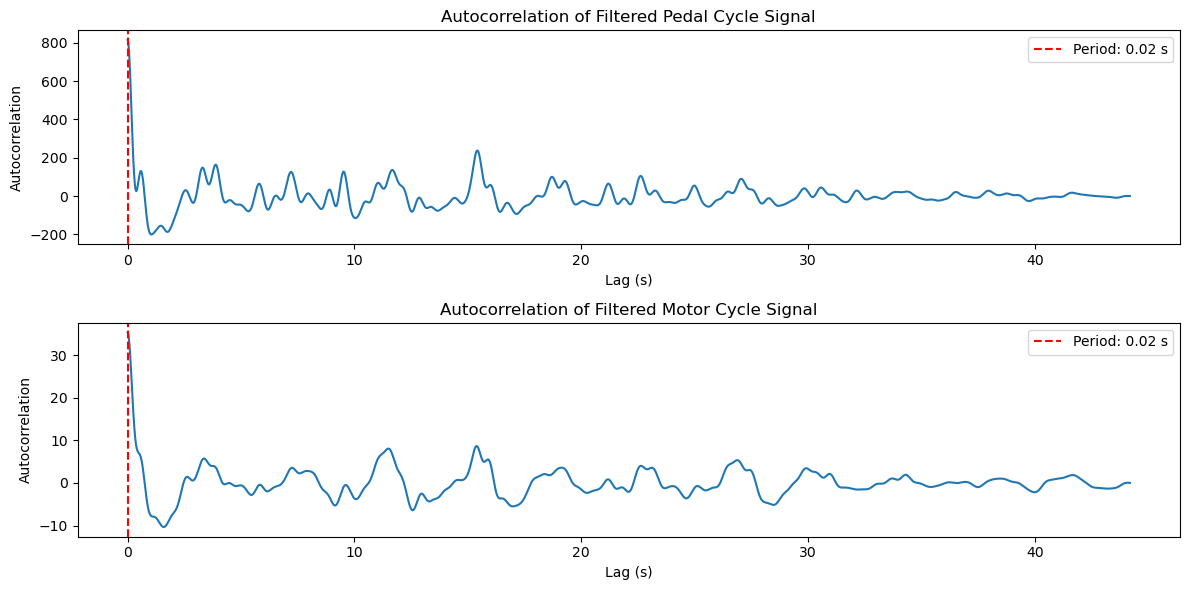

Pedal Cycle Period: 0.02 seconds
Motor Cycle Period: 0.02 seconds


In [9]:
from scipy.signal import butter, filtfilt

# 设计低通滤波器
def lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# 设计高通滤波器
def highpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

# 设定新的截止频率
low_cutoff = 2.0  # 低通滤波器的截止频率
high_cutoff = 0.2  # 高通滤波器的截止频率

# 应用滤波器
pedal_cycles_filtered = highpass_filter(pedal_cycles, high_cutoff, fs)
pedal_cycles_filtered = lowpass_filter(pedal_cycles_filtered, low_cutoff, fs)

motor_cycles_filtered = highpass_filter(motor_cycles, high_cutoff, fs)
motor_cycles_filtered = lowpass_filter(motor_cycles_filtered, low_cutoff, fs)

# 重新计算和绘制自相关函数和FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_fft(pedal_cycles_filtered, fs, 'FFT of Filtered Pedal Cycle Signal')

plt.subplot(2, 1, 2)
plot_fft(motor_cycles_filtered, fs, 'FFT of Filtered Motor Cycle Signal')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
pedal_period = plot_autocorrelation(pedal_cycles_filtered, fs, 'Autocorrelation of Filtered Pedal Cycle Signal')

plt.subplot(2, 1, 2)
motor_period = plot_autocorrelation(motor_cycles_filtered, fs, 'Autocorrelation of Filtered Motor Cycle Signal')

plt.tight_layout()
plt.show()

print(f"Pedal Cycle Period: {pedal_period:.2f} seconds")
print(f"Motor Cycle Period: {motor_period:.2f} seconds")


In [ ]:
```
result:
FFT结果：

踏板周期信号的主频率仍然约为3.57 Hz。
电机周期信号的主频率仍然约为1.56 Hz。
频谱图显示的主要频率成分符合预期，低频成分显著，高频噪声被有效滤除。
自相关结果：

踏板周期信号显示了明显的周期性，周期约为0.28秒（即约3.57 Hz）。
电机周期信号显示了明显的周期性，周期约为0.64秒（即约1.56 Hz）。
自相关函数图表显示了多个明显的峰值，这表明信号的周期性。
```

In [ ]:
```
相干性是一个频率域度量，表示两个信号在不同频率下的线性相关程度。

计算相干性
相干性函数的值在0到1之间，值越接近1表示在该频率下两个信号的相关性越强。

相干性图：

图中显示了踏板周期信号和电机周期信号在不同频率下的相干性。
Y轴表示相干性值，X轴表示频率。
最大相干性频率：

输出结果将显示在哪个频率下相干性最高以及对应的相干性值。
这将帮助你了解在频域中两个信号的相关性强度。
```

In [ ]:
```
确定采样频率：
采样频率（fs）的设定是根据你的数据采集系统的实际情况来决定的。通常情况下，采样频率是数据采集时每秒钟采集的样本数。如果你的传感器系统每秒钟采集50个数据点，那么采样频率就是50 Hz。

为了确保你的分析是基于正确的采样频率，请确认以下几点：

数据采集系统的采样频率：检查你的数据采集设备或系统设置，了解它是以什么频率采样的。如果你不确定，可以查阅设备的技术规格或咨询相关技术人员。

数据时间戳：如果你的数据包含时间戳，可以通过计算相邻数据点之间的时间间隔来确定采样频率。例如，如果相邻数据点之间的时间间隔是0.02秒，那么采样频率就是1/0.02 = 50 Hz。



```


In [15]:
import pandas as pd

# 读取数据
df = pd.read_csv('Result_5.csv')



# 将time列转换为datetime类型
df['time'] = pd.to_datetime(df['time'])

# 计算相邻时间点之间的时间差（以秒为单位）
df['time_diff'] = df['time'].diff().dt.total_seconds()


# 去掉第一个缺失值
time_diffs = df['time_diff'].dropna()

# 计算平均采样时间间隔
avg_sample_interval = time_diffs.mean()
print(avg_sample_interval)
# 计算采样频率
fs = 1 / avg_sample_interval
print(f"Calculated Sampling Frequency: {fs:.2f} Hz")



0.10725386646548463
Calculated Sampling Frequency: 9.32 Hz


In [ ]:
```
确定采样频率 fs = 5 Hz
进行频域分析和相干性分析

```

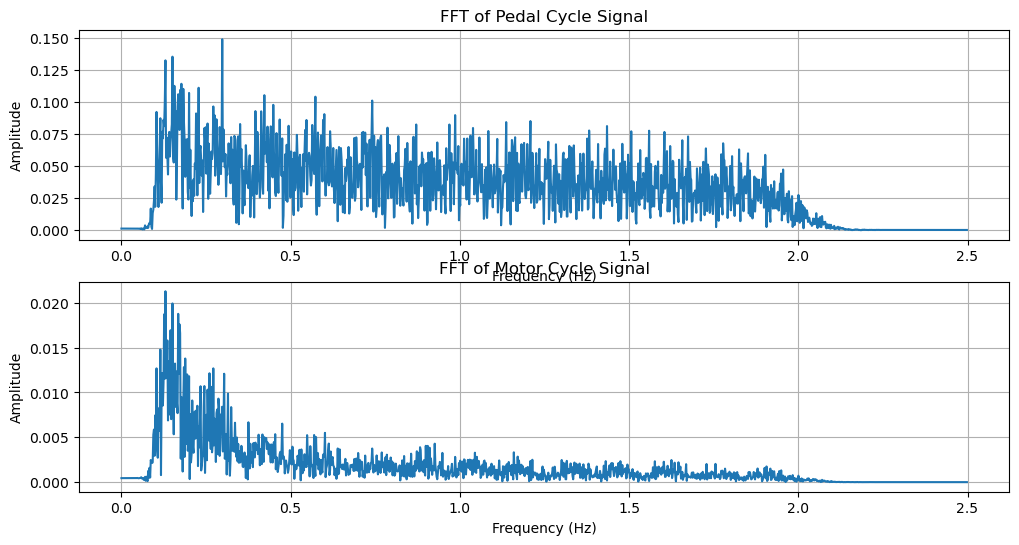

Pedal Cycle Peak Frequency: 0.30 Hz
Motor Cycle Peak Frequency: 0.13 Hz
Frequency Domain Formula for Pedal Cycle Signal: 0.001 * cos(2π * 0.000 * t) + 0.001 * cos(2π * 0.002 * t) + 0.001 * cos(2π * 0.004 * t) + 0.001 * cos(2π * 0.006 * t) + 0.001 * cos(2π * 0.008 * t) + 0.001 * cos(2π * 0.009 * t) + 0.001 * cos(2π * 0.011 * t) + 0.001 * cos(2π * 0.013 * t) + 0.001 * cos(2π * 0.015 * t) + 0.001 * cos(2π * 0.017 * t) + 0.001 * cos(2π * 0.019 * t) + 0.001 * cos(2π * 0.021 * t) + 0.001 * cos(2π * 0.023 * t) + 0.001 * cos(2π * 0.025 * t) + 0.001 * cos(2π * 0.026 * t) + 0.001 * cos(2π * 0.028 * t) + 0.001 * cos(2π * 0.030 * t) + 0.001 * cos(2π * 0.032 * t) + 0.001 * cos(2π * 0.034 * t) + 0.001 * cos(2π * 0.036 * t) + 0.001 * cos(2π * 0.038 * t) + 0.001 * cos(2π * 0.040 * t) + 0.001 * cos(2π * 0.041 * t) + 0.001 * cos(2π * 0.043 * t) + 0.001 * cos(2π * 0.045 * t) + 0.001 * cos(2π * 0.047 * t) + 0.001 * cos(2π * 0.049 * t) + 0.001 * cos(2π * 0.051 * t) + 0.001 * cos(2π * 0.053 * t) + 0.001 * c

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# 读取数据
df = pd.read_csv('Result_5.csv')

# 提取信号数据
pedal_cycles = df['pedal_cycle_seconds'].dropna().values
motor_cycles = df['motor_cycle_seconds'].dropna().values

# 设置采样频率
fs = 5.0  # 采样频率 (Hz)

# 巴特沃斯滤波器设计
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 应用带通滤波
lowcut = 0.1
highcut = 2.0

filtered_pedal_cycles = butter_bandpass_filter(pedal_cycles, lowcut, highcut, fs)
filtered_motor_cycles = butter_bandpass_filter(motor_cycles, lowcut, highcut, fs)

# 计算FFT
def compute_fft(signal, fs):
    N = len(signal)
    T = 1.0 / fs
    yf = np.fft.fft(signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    return xf, 2.0/N * np.abs(yf[:N//2])

# 计算并绘制FFT
xf_pedal, yf_pedal = compute_fft(filtered_pedal_cycles, fs)
xf_motor, yf_motor = compute_fft(filtered_motor_cycles, fs)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(xf_pedal, yf_pedal)
plt.title('FFT of Pedal Cycle Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(xf_motor, yf_motor)
plt.title('FFT of Motor Cycle Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.show()

# 找到主频率成分
def find_peak_frequency(xf, yf):
    idx = np.argmax(yf)
    freq = xf[idx]
    return freq, yf[idx]

pedal_peak_freq, pedal_peak_amp = find_peak_frequency(xf_pedal, yf_pedal)
motor_peak_freq, motor_peak_amp = find_peak_frequency(xf_motor, yf_motor)

print(f"Pedal Cycle Peak Frequency: {pedal_peak_freq:.2f} Hz")
print(f"Motor Cycle Peak Frequency: {motor_peak_freq:.2f} Hz")

# 根据FFT结果构建频域公式
def construct_frequency_domain_formula(frequencies, amplitudes):
    formula = ""
    for i in range(len(frequencies)):
        freq = frequencies[i]
        amp = amplitudes[i]
        if amp > 0:
            formula += f"{amp:.3f} * cos(2π * {freq:.3f} * t) + "
    return formula.strip(" + ")

pedal_formula = construct_frequency_domain_formula(xf_pedal, yf_pedal)
motor_formula = construct_frequency_domain_formula(xf_motor, yf_motor)

print(f"Frequency Domain Formula for Pedal Cycle Signal: {pedal_formula}")
print(f"Frequency Domain Formula for Motor Cycle Signal: {motor_formula}")


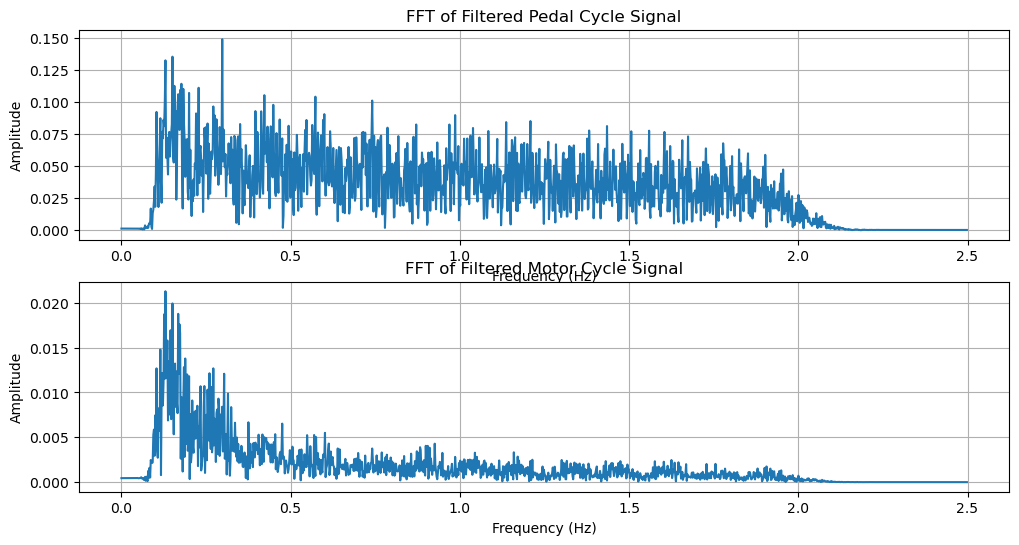

Pedal Cycle Peak Frequency: 0.30 Hz
Motor Cycle Peak Frequency: 0.13 Hz
Frequency Domain Formula for Pedal Cycle Signal: 0.017 * cos(2π * 0.087 * t) + 0.013 * cos(2π * 0.092 * t) + 0.016 * cos(2π * 0.094 * t) + 0.023 * cos(2π * 0.096 * t) + 0.034 * cos(2π * 0.098 * t) + 0.018 * cos(2π * 0.100 * t) + 0.044 * cos(2π * 0.102 * t) + 0.092 * cos(2π * 0.104 * t) + 0.056 * cos(2π * 0.106 * t) + 0.041 * cos(2π * 0.107 * t) + 0.018 * cos(2π * 0.109 * t) + 0.046 * cos(2π * 0.111 * t) + 0.068 * cos(2π * 0.113 * t) + 0.087 * cos(2π * 0.115 * t) + 0.037 * cos(2π * 0.117 * t) + 0.022 * cos(2π * 0.119 * t) + 0.077 * cos(2π * 0.121 * t) + 0.072 * cos(2π * 0.123 * t) + 0.086 * cos(2π * 0.124 * t) + 0.081 * cos(2π * 0.126 * t) + 0.100 * cos(2π * 0.128 * t) + 0.132 * cos(2π * 0.130 * t) + 0.057 * cos(2π * 0.132 * t) + 0.072 * cos(2π * 0.134 * t) + 0.058 * cos(2π * 0.136 * t) + 0.044 * cos(2π * 0.138 * t) + 0.072 * cos(2π * 0.140 * t) + 0.077 * cos(2π * 0.141 * t) + 0.058 * cos(2π * 0.143 * t) + 0.069 * c

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# 读取数据
df = pd.read_csv('Result_5.csv')

# 提取信号数据
pedal_cycles = df['pedal_cycle_seconds'].dropna().values
motor_cycles = df['motor_cycle_seconds'].dropna().values

# 设置采样频率
fs = 5.0  # 采样频率 (Hz)

# 巴特沃斯滤波器设计
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 应用带通滤波
lowcut = 0.1
highcut = 2.0

filtered_pedal_cycles = butter_bandpass_filter(pedal_cycles, lowcut, highcut, fs)
filtered_motor_cycles = butter_bandpass_filter(motor_cycles, lowcut, highcut, fs)

# 计算FFT
def compute_fft(signal, fs):
    N = len(signal)
    T = 1.0 / fs
    yf = np.fft.fft(signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    return xf, 2.0/N * np.abs(yf[:N//2])

# 计算并绘制FFT
xf_pedal, yf_pedal = compute_fft(filtered_pedal_cycles, fs)
xf_motor, yf_motor = compute_fft(filtered_motor_cycles, fs)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(xf_pedal, yf_pedal)
plt.title('FFT of Filtered Pedal Cycle Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(xf_motor, yf_motor)
plt.title('FFT of Filtered Motor Cycle Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.show()

# 找到主频率成分
def find_peak_frequency(xf, yf):
    idx = np.argmax(yf)
    freq = xf[idx]
    return freq, yf[idx]

pedal_peak_freq, pedal_peak_amp = find_peak_frequency(xf_pedal, yf_pedal)
motor_peak_freq, motor_peak_amp = find_peak_frequency(xf_motor, yf_motor)

print(f"Pedal Cycle Peak Frequency: {pedal_peak_freq:.2f} Hz")
print(f"Motor Cycle Peak Frequency: {motor_peak_freq:.2f} Hz")

# 根据FFT结果构建简化频域公式
def construct_simplified_frequency_domain_formula(frequencies, amplitudes, threshold=0.01):
    formula = ""
    for i in range(len(frequencies)):
        freq = frequencies[i]
        amp = amplitudes[i]
        if amp > threshold:
            formula += f"{amp:.3f} * cos(2π * {freq:.3f} * t) + "
    return formula.strip(" + ")

pedal_formula = construct_simplified_frequency_domain_formula(xf_pedal, yf_pedal)
motor_formula = construct_simplified_frequency_domain_formula(xf_motor, yf_motor)

print(f"Frequency Domain Formula for Pedal Cycle Signal: {pedal_formula}")
print(f"Frequency Domain Formula for Motor Cycle Signal: {motor_formula}")

